# This notebook is used to implement mnist dataset recognation.

In [1]:
import sys, os
sys.path.append(os.pardir)

In [2]:
from mnist import MNIST

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt
def img_show(image, label):
    plt.imshow(image, cmap='gray')
    plt.title('Label: {}'.format(label))
    plt.show()

In [5]:
def get_data():
    mndata = MNIST(os.getcwd() + '\dataset')
    images, labels = mndata.load_testing()
    images = np.array(images)
    labels = np.array(labels)
    sample_idx = np.random.randint(10001)
    image = images[sample_idx]
    label = labels[sample_idx]
    img_show(image.reshape((28, 28)), label)
    return image, label

In [6]:
import pickle
def init_network():
    with open(os.path.join(os.getcwd(), 'networks', 'pretrain_mnist_weight.pkl'), 'rb') as f:
        network = pickle.load(f)        
    return network

In [7]:
def sigmoid(z):
    """This function used to implement sigmoid function
    Input: x, an array_like object;
    Output: y, output."""
    y = 1 / (1 + np.exp(-z))
    return y

In [8]:
def softmax(x):
    c = np.max(x)
    y = np.exp(x - c) / np.sum(np.exp(x-c))
    return y

In [9]:
def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    z1 = np.dot(x, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)
    z3 = np.dot(a2, W3) + b3
    y = softmax(z3)
    return y

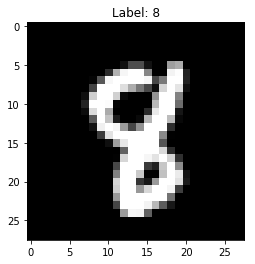

In [10]:
image, label = get_data()

In [11]:
network = init_network()
print(network.keys())
print(network['W1'].shape)
print(network['W2'].shape)
print(network['W3'].shape)
print(network['b1'].shape)
print(network['b2'].shape)
print(network['b3'].shape)

dict_keys(['b2', 'W1', 'b1', 'W2', 'W3', 'b3'])
(784, 50)
(50, 100)
(100, 10)
(50,)
(100,)
(10,)


In [12]:
y = predict(network, image)
print(y)

[1.89503238e-07 3.15429651e-05 5.56737880e-04 8.36541271e-05
 2.06361038e-03 1.59233202e-04 9.29383755e-06 2.51667205e-06
 9.96019389e-01 1.07383264e-03]


In [13]:
p = np.argmax(y)
print(p)

8


In [14]:
def get_data_batch():
    mndata = MNIST(os.getcwd() + '\dataset')
    images, labels = mndata.load_testing()
    images = np.array(images)
    labels = np.array(labels)
    return images, labels

In [15]:
images, labels = get_data_batch()

In [16]:
y = predict(network, images)

In [17]:
print(y)

[[1.82347852e-09 1.94469072e-10 7.86149971e-08 ... 4.24919211e-04
  1.61884012e-10 2.25741576e-07]
 [8.70744431e-09 2.76972120e-08 2.38235695e-05 ... 6.43935368e-12
  6.91774422e-09 9.98816313e-14]
 [5.52419326e-15 3.98711615e-04 5.17405342e-08 ... 1.23152805e-09
  4.58970035e-08 1.44654035e-10]
 ...
 [1.62971126e-12 1.69919668e-10 5.68549880e-10 ... 2.06216441e-09
  3.19356170e-08 2.02176100e-07]
 [1.85670563e-09 6.52772623e-10 2.17620865e-10 ... 5.72707334e-11
  1.69933369e-06 4.63467827e-10]
 [8.43241988e-09 8.20658815e-11 5.07699174e-08 ... 1.50534420e-11
  1.16854605e-10 4.10430225e-11]]


In [18]:
p = np.argmax(y, axis=1)
print(p)
print(p.shape)

[7 2 1 ... 4 8 6]
(10000,)


In [19]:
accuracy_cnt = np.sum((p == labels).astype(np.float)) / labels.size
print(accuracy_cnt)

0.9207
